## Explainer notebook

# 1. Motivation


* The StackOverFlow dataset caught our attention since it is a website we have been using a lot over the time of our bachelor degree. The dataset consists of questions asked from 2009 and answers to those questions.

* The reason we chose this dataset is due to the amount of data it contains, which only benefits to have a lot of data at our disposal.

* The central idea behind the project is to research communities on a subset of StackOverFlow Q&A using a network describing interactions between users. It is interesting to answer questions like- What is the modularity of the Network, How discernable are the communities from each other in terms of topics discussed & How do they differ? A hypothesis could be that each community uses primarily their own programming language. We could also google the top 5 authors by score or amount of activity to see their specialization - It can also be interesting to look at score, does the highest scoring post depend on community size and to what degree if? Are some communities better at resolving questions? Look at proportion of closed to non-closed questions. It is our job to show the end user's experience the connections there is in such a network like this by answering these questions.


Dataset is licensed under CC-BY-SA 3.0 with attribution required - meaning it can freely be modified & used both for commercial and research purposes as long as attributed. Top contributors are Miljan Stojiljkovic, Niyamat Ullah, Kartik Garg - See link for rest of contributors.
https://www.kaggle.com/datasets/stackoverflow/stacksample

In [5]:
import numpy as np
import threading 
from tqdm import tqdm
import pickle
import pandas as pd
import sklearn
import networkx as nx
from ast import literal_evalcommunity_df_a3
import netwulf as nw
from bs4 import BeautifulSoup
from networkx.algorithms import community
from community import community_louvain
import matplotlib.pyplot as plt
from PIL import Image

# 2. Basic stats

The code will not be run again since it takes along time to run it, instead:

* Roll down - Don't run the code in first section, takes too much time. Roll down until clean data is loaded & a subset_dataset is made.


Firstly we start by importing the data with pandas, then we clean the rows from all NA values.

In [ ]:
##Loading and Removing NA Rows. Is important to not use for loop, when a solution of constant time complexity exists, when handling data.
answers = '/work3/s204161/comp_social_science_data/Answers.csv'
questions = '/work3/s204161/comp_social_science_data/Questions.csv'
tags = '/work3/s204161/comp_social_science_data/Tags.csv'

answers_df = pd.read_csv(answers, encoding='ISO-8859-1')
questions_df = pd.read_csv(questions, encoding='ISO-8859-1')
tags_df = pd.read_csv(tags)

In [ ]:
#clean rows with NA values in them.
clean_answers_df = answers_df.dropna(subset=answers_df.columns, axis=0, how='any')
clean_questions_df = questions_df.dropna(subset=questions_df.columns.difference(['ClosedDate']), axis=0, how='any')
print(f'Answers_df\nSize before: {len(answers_df.index)}\nSize After: {len(clean_answers_df.index)}')
print(f'Questions_df\nSize before: {len(questions_df.index)}\nSize After: {len(clean_questions_df.index)}')

clean_questions_df['OwnerUserId'] = np.asarray(clean_questions_df.get('OwnerUserId'),dtype=int)
clean_answers_df['OwnerUserId'] = np.asarray(clean_answers_df.get('OwnerUserId'),dtype=int)

clean_answers_df.to_csv('/work3/s204161/comp_social_science_data/no_NA_Answers.csv', encoding='ISO-8859-1', index=False)
clean_questions_df.to_csv('/work3/s204161/comp_social_science_data/no_NA_Questions.csv', encoding='ISO-8859-1', index=False)


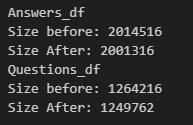

In [ ]:
# Here we see how many unique nodes can be created
unique_users = np.unique(np.asarray(np.append(np.append(clean_questions_df.get('OwnerUserId'),clean_answers_df.get('OwnerUserId')),clean_answers_df.get('ParentId')),dtype=int)) ## This number is wrong, parentId should not be included.
print(f'unique_nodes: {len(unique_users)}')